# Project 1

# Linear Regression

# 1) Explore Data

In [56]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

In [57]:
data = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/diabetes2.csv"

In [52]:
#grabs data from online link
diabetes = pd.read_csv(data)
#reads data from csv file
diabetes.head()
#looks at the first 5 observations of the csv file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


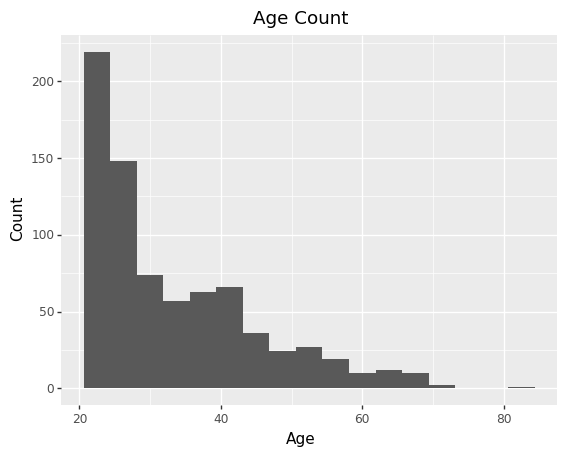

<ggplot: (301571917)>

In [4]:
(ggplot(diabetes, aes("Age")) 
 + geom_histogram(aes(fill = "Age")) 
 + labs(title = "Age Count", x = "Age", y = "Count"))

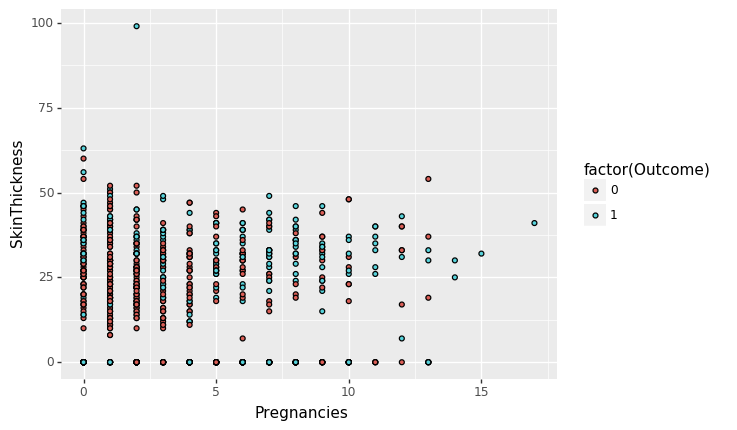

<ggplot: (301578353)>

In [5]:
(ggplot(diabetes, aes("Pregnancies", "SkinThickness")) 
 + geom_point(aes(fill = "factor(Outcome)")))

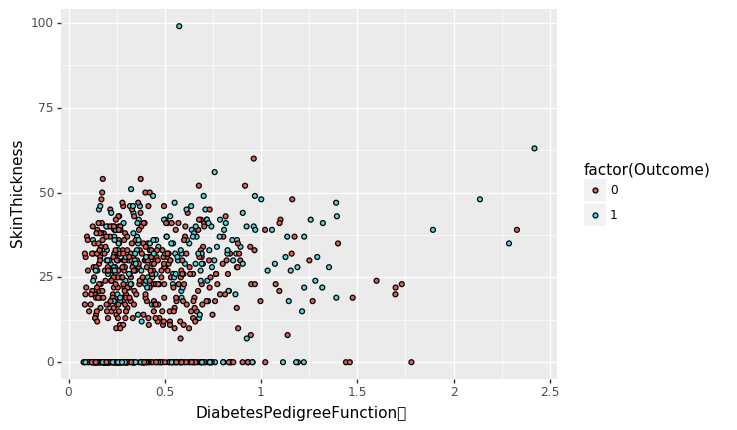

<ggplot: (301571853)>

In [6]:
(ggplot(diabetes, aes("DiabetesPedigreeFunction	", "SkinThickness")) 
 + geom_point(aes(fill = "factor(Outcome)")))

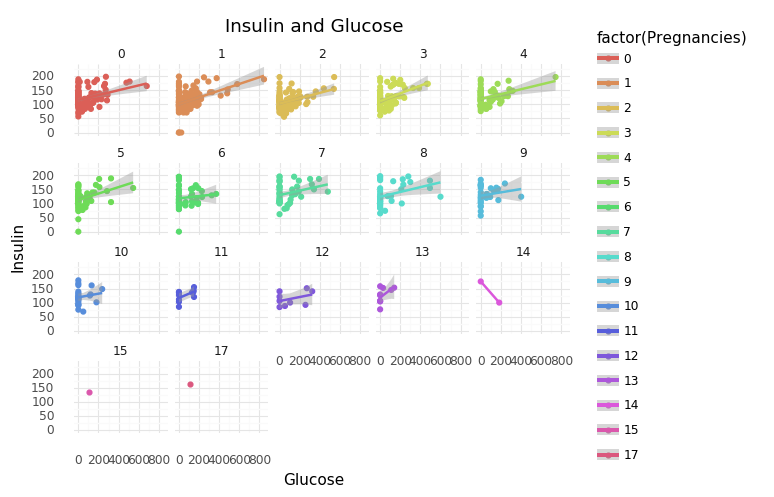

<ggplot: (302875505)>

In [7]:
(ggplot(diabetes, aes('Insulin', 'Glucose', color = 'factor(Pregnancies)'))
 + geom_point() #creates point graph
 + stat_smooth(method='lm') #smooths the slope line
 + facet_wrap('~Pregnancies') #seperates each mfr into its own graph
 + theme_minimal()  
 + labs(title = "Insulin and Glucose",
     x = "Glucose", y = "Insulin")) #labels the graph

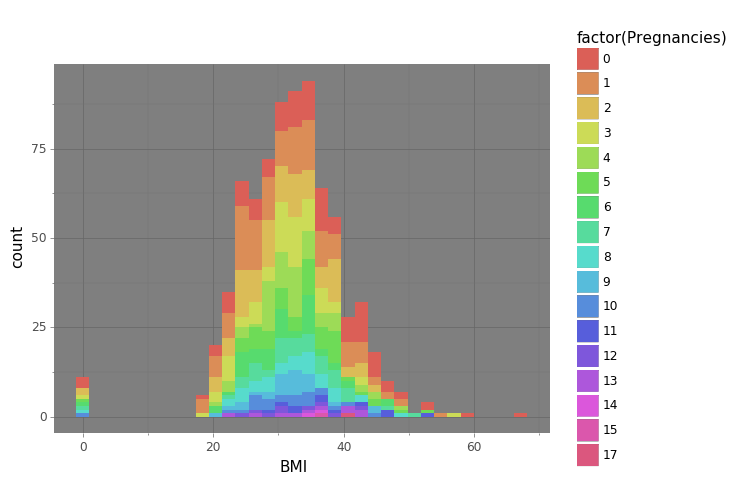

<ggplot: (302919769)>

In [8]:
(ggplot(diabetes, aes('BMI'))
 + theme_dark()
 + geom_histogram(aes(fill = "factor(Pregnancies)")))

# 2) Building My Model

In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# creates predictors 
predictors = ["Glucose", "BloodPressure", "Insulin", "Age", "SkinThickness", "Pregnancies", "DiabetesPedigreeFunction"]

#creates test data and training data
X_train, X_test, y_train, y_test = train_test_split(diabetes[predictors], diabetes["BMI"], test_size=0.2)

In [11]:
#Standardization
zscore = StandardScaler()
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)


# 3) Evaluate your model 

In [12]:
# create linearRegression model 
LR_Model = LinearRegression()

In [13]:
# fit logModel
LR_Model.fit(Xz_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
BMI_preds = LR_Model.predict(Xz_test)

In [18]:
mean_squared_error(y_test,BMI_preds)

47.737293995292326

In [19]:
r2_score(y_test,BMI_preds)

0.23325950918080884

In [19]:
# ERROR
# My model did not do to well. My mean-squared error was 47.73 

# ACCURACY
# Also my model had a r score of 0.23 which is not very good. 

# 4) Interpret the coefficients to your model

In [20]:
coefficients = pd.DataFrame({"Coef":LR_Model.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model.intercept_,
                    "Name": "intercept"}, ignore_index = True)

In [21]:
coefficients

,Coef,Name
0,1.546936,Glucose
1,1.120048,BloodPressure
2,-0.492824,Insulin
3,-0.227689,Age
4,3.038312,SkinThickness
5,0.017818,Pregnancies
6,0.377344,DiabetesPedigreeFunction
7,31.975407,intercept


In [23]:
# These coefficients show the affect of these variables on the BMI level 
# For one stdv increase of Glucose there is a 1.547 increase in BMI
# For one stdv increase of BloodPressure there is a 1.120 increase in BMI
# For one stdv increase of Insulin there is a -0.493 decrease in BMI
# For one stdv increase of Age there is a -0.228 decrease in BMI
# For one stdv increase of SkinThickness there is a 3.038 increase in BMI
# For one stdv increase of Pregnancies there is a 0.018 in BMI
# For one stdv increase of DiabetesPedigreeFunction there is a 0.377 increaes in BMI
# If there were no variables involved, y-intercept is 31.975

# Logistic Regression

# 1) Explore Data

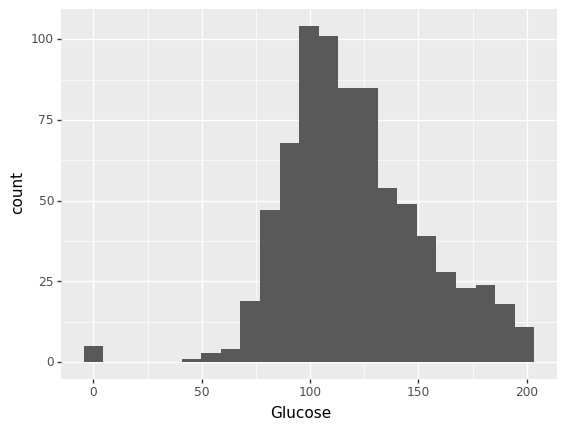

<ggplot: (317381793)>

In [49]:
(ggplot(diabetes, aes("Glucose")) 
 + geom_histogram()) 

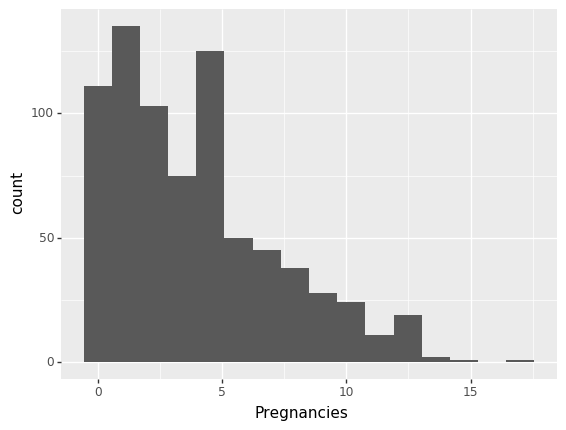

<ggplot: (317578725)>

In [46]:
(ggplot(diabetes, aes("Pregnancies")) 
 + geom_histogram()) 

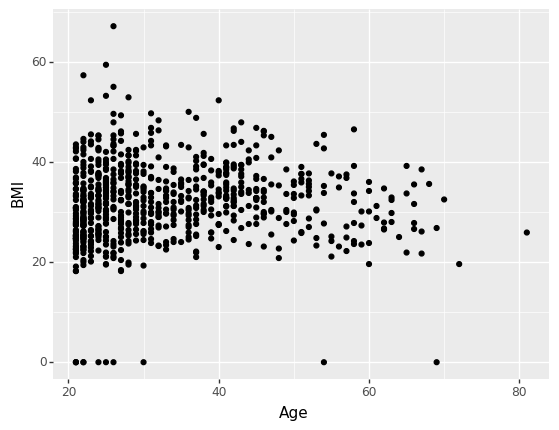

<ggplot: (317043029)>

In [53]:
(ggplot(diabetes, aes("Age", "BMI")) 
 + geom_point()) 

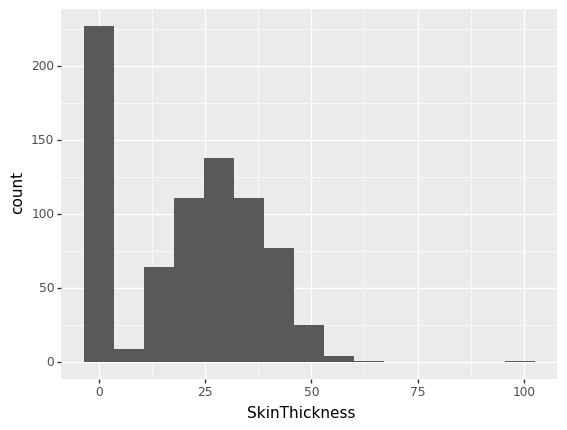

<ggplot: (316943769)>

In [54]:
(ggplot(diabetes, aes("SkinThickness")) 
 + geom_histogram()) 

# 2) Building My Model

In [53]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
# Kfold

X = diabetes[["Glucose", "Pregnancies", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age"]]
y = diabetes["Outcome"]

# create k-fold object
kf = KFold(n_splits = 8)
kf.split(X)

# standardization
zScore = StandardScaler()
zScore.fit(X)
Xz = zScore.transform(X)

lr = LogisticRegression() #create model

acc = [] #create empty list to store accuracy for each fold

In [64]:
# Use a for loop to loop through each fold and train a model, then add the accuracy to acc.

for train_indices, test_indices in kf.split(Xz):
    # Get your train/test for this fold
    X_train_k = X.iloc[train_indices]
    X_test_k  = X.iloc[test_indices]
    y_train_k = y[train_indices]
    y_test_k  = y[test_indices]
    
    # model
    model = lr.fit(X_train_k, y_train_k)
    # record accuracy
    acc.append(accuracy_score(y_test_k, model.predict(X_test_k)))
    
#print overall acc
print(acc)
np.mean(acc)

[0.7395833333333334, 0.8125, 0.7083333333333334, 0.75, 0.7708333333333334, 0.8125, 0.78125, 0.7916666666666666]


0.7708333333333334

# Evaluating my Model

In [66]:
len(diabetes)

768

Metrics/Interpretation of model: I used the accuracy score to determine how accurate my model was. I got an accuracy score of 0.77 which is a pretty accurate model score so I am happy with my model

Justification for Cross-val technique: Since there are hundreds of observations in this dataset(768), I chose to do K fold as my cross-validation technique because it is less computationally expensive.

# Data Viz

# #1

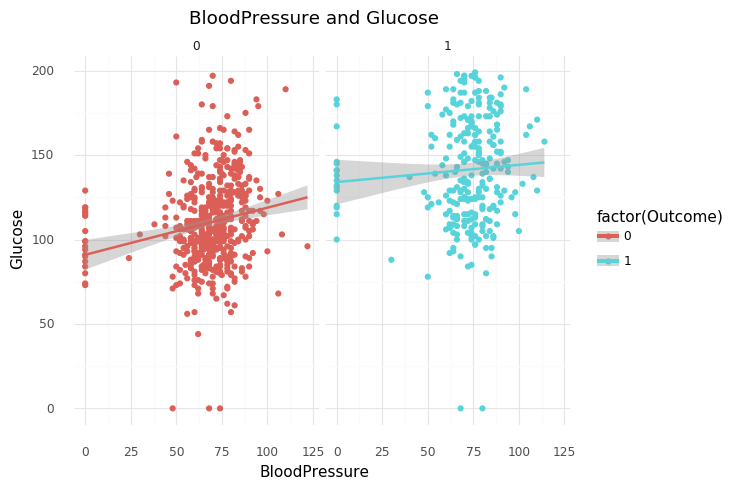

<ggplot: (317131621)>

In [37]:
(ggplot(diabetes, aes('BloodPressure', 'Glucose', color = "factor(Outcome)"))
 + geom_point() #creates point graph
 + stat_smooth(method='lm') #smooths the slope line
 + facet_wrap('~Outcome') #seperates each mfr into its own graph
 + theme_minimal()  
 + labs(title = "BloodPressure and Glucose",
     x = "BloodPressure", y = "Glucose")) #labels the graph

# #2

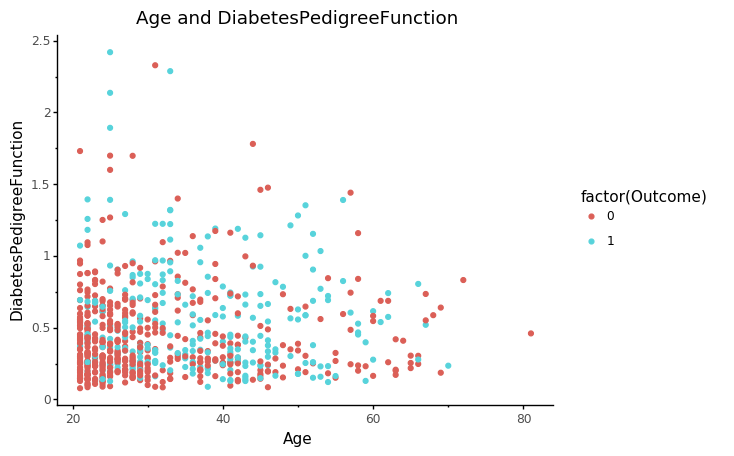

<ggplot: (317195853)>

In [59]:
(ggplot(diabetes, aes('Age', 'DiabetesPedigreeFunction', color = 'factor(Outcome)'))
 + geom_point() #creates point graph
 + theme_classic()  
 + labs(title = "Age and DiabetesPedigreeFunction",
     x = "Age", y = "DiabetesPedigreeFunction")) #labels the graph